In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import openpyxl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
minw=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\min_wind_speed.csv")

In [3]:
minw

,Year,Month,past,pasttopast,min_wind_speed
0,1990,1,1.353750,2.360000,0.553125
1,1990,2,0.537500,0.545000,1.088125
2,1990,3,0.888750,0.370000,0.631250
3,1990,4,0.813750,0.247500,0.340000
4,1990,5,0.700000,0.604375,0.276250
...,...,...,...,...,...
355,2019,8,0.536875,0.168750,1.165625
356,2019,9,0.336250,0.256875,0.486875
357,2019,10,0.353125,0.211250,0.328750
358,2019,11,0.768125,0.353125,0.273750


In [4]:
minw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            360 non-null    int64  
 1   Month           360 non-null    int64  
 2   past            360 non-null    float64
 3   pasttopast      360 non-null    float64
 4   min_wind_speed  360 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.2 KB


In [5]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=minw.corr()
corr_matrix

,Year,Month,past,pasttopast,min_wind_speed
Year,1.000000e+00,2.844429e-15,-0.092949,-0.104320,-0.063475
Month,2.844429e-15,1.000000e+00,0.004158,0.017340,-0.006071
past,-9.294875e-02,4.157952e-03,1.000000,0.340955,0.327694
pasttopast,-1.043204e-01,1.734017e-02,0.340955,1.000000,0.319946
min_wind_speed,-6.347531e-02,-6.071111e-03,0.327694,0.319946,1.000000


In [6]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


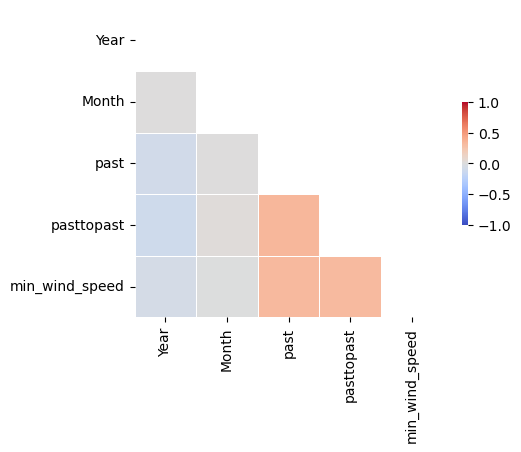

In [7]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [8]:
minw=minw.drop(['Year','Month'],axis=1)

In [9]:
minw.shape

(360, 3)

In [10]:
X=minw.drop('min_wind_speed',axis=1)
y=minw.min_wind_speed

In [11]:
X

,past,pasttopast
0,1.353750,2.360000
1,0.537500,0.545000
2,0.888750,0.370000
3,0.813750,0.247500
4,0.700000,0.604375
...,...,...
355,0.536875,0.168750
356,0.336250,0.256875
357,0.353125,0.211250
358,0.768125,0.353125


In [12]:
y

0      0.553125
1      1.088125
2      0.631250
3      0.340000
4      0.276250
         ...   
355    1.165625
356    0.486875
357    0.328750
358    0.273750
359    1.871250
Name: min_wind_speed, Length: 360, dtype: float64

In [13]:
X.shape

(360, 2)

In [14]:
y.shape

(360,)

In [15]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping data for LSTM/GRU/RNN (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# GRU

In [16]:
def create_gru_model(units=64):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [17]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_19368\2098133132.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)


In [18]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [19]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [20]:
gru_grid_result = gru_grid.fit(X_train, y_train)

In [21]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 32, 'epochs': 50, 'units': 64}
Best GRU score: -0.31402045958029007


# LSTM

In [22]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [23]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_19368\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [24]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [25]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [26]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [27]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 16, 'epochs': 50, 'units': 128}
Best LSTM score: -0.31470674993146863


# RNN

In [28]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [29]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_19368\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [30]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [31]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [32]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [33]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 32, 'epochs': 50, 'units': 32}
Best SimpleRNN score: -0.3122326579755165


In [34]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)

print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"SimpleRNN Model - MSE: {mse_rnn}")


GRU Model - MSE: 0.24656789820810937
LSTM Model - MSE: 0.2472853515697532
SimpleRNN Model - MSE: 0.24631740923437231


## LSTM is sutaible for MinWind with least MSE

In [44]:
minw2021=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\precipitation.csv")

In [45]:
minw2021 = minw2021.drop(['Year', 'Month'],axis=1)

In [46]:
minw2021

,past,pasttopast
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,1.516250
5,0.000000,0.000000
6,0.856875,0.000000
7,4.875625,1.053750
8,5.270000,1.580625
9,6.853750,5.270000


In [47]:
minw2020_pred1=[]

In [48]:
minw2021_scaled = scaler.transform(minw2021)

# Reshape for prediction
minw2021_scaled = np.reshape(minw2021_scaled, (minw2021_scaled.shape[0], minw2021_scaled.shape[1], 1))

In [49]:
best_model = rnn_grid_result.best_estimator_

minw2020_pred1=best_model.predict(minw2021_scaled)

In [50]:
minw2020_pred1

array([0.4236212 , 0.4236212 , 0.4236212 , 0.4236212 , 0.76259834,
       0.4236212 , 0.61881   , 1.5409259 , 1.6828843 , 2.3031151 ,
       2.4374957 , 1.5221726 ], dtype=float32)

In [51]:
minwind_data=pd.DataFrame(data=minw2020_pred1)
minwind_data

,0
0,0.423621
1,0.423621
2,0.423621
3,0.423621
4,0.762598
5,0.423621
6,0.618810
7,1.540926
8,1.682884
9,2.303115


In [52]:
minwind_data.to_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\min_wind_speed1.csv")